In [123]:
name_code           = "Testing_ElectronNuclearDynamics_BinaryIOData_ScaleNuclearCoord";
# name_code           = "Testing_ElectronNuclearDynamics_BinaryIOData";
path_models         = "../outputs/"*name_code*"/models/";
path_images         = "../outputs/"*name_code*"/images/";
path_plots          = "../outputs/"*name_code*"/plots/";

In [124]:
# set unit convertion constant
const Bohr_radius_meter=5.29177210903e−11;                        # [m]
const Angstrom_to_meter=1e−10;                                    # [m/Å]
const Angstrom_to_au=Angstrom_to_meter*(1.0/Bohr_radius_meter);   # [au/Å]
const Femtoseconds_to_au=(1.0/0.0218884);                         # [au/fs
const m=1.0;            # electron mass
const M=2000.0*m;       # proton mass
const ħ=1.0;            # Planck constant
const γ=sqrt(M*(1.0/m));    # scaling factor (R=γχ)

In [125]:
n_1D_r=50;n_1D_R=50;
dim_time=92;
set_Rc_value=1; # set_Rc_value=1 or set_Rc_value=2
if (set_Rc_value==1)
    Rc=1.5*Angstrom_to_au;  # screening parameter
    χ₀=-3.5*Angstrom_to_au; # Gaussian's center of init state
    n_eigenstate=1;         # fundamental state
elseif (set_Rc_value==2) 
    Rc=5.0*Angstrom_to_au;
    χ₀=-1.5*Angstrom_to_au;
    n_eigenstate=2;  # first excited state
end

1

In [126]:
include("./BinaryFileIO_testing.jl");

In [127]:
outfile_name = path_images*"relative_error_convergence_study_Rc$(round(Rc/Angstrom_to_au;digits=2))_grid$(n_1D_r)x$(n_1D_R).bin"
convergence_vector = read_bin(outfile_name;matrix_data=false);
println(convergence_vector[end])

0.997867541691055


In [128]:
outfile_name = path_images*"electronic_density_vs_time_Rc$(round(Rc/Angstrom_to_au;digits=2))_grid$(n_1D_r)x$(n_1D_R).bin"
electronic_ρ_matrix_χ_plus_r = read_bin(outfile_name;matrix_data=true,c_dim=(dim_time+1));
electronic_ρ_matrix_χ = electronic_ρ_matrix_χ_plus_r[:,2:end];

outfile_name = path_images*"nuclear_density_vs_time_Rc$(round(Rc/Angstrom_to_au;digits=2))_grid$(n_1D_r)x$(n_1D_R).bin"
nuclear_ρ_matrix_χ_plus_r = read_bin(outfile_name;matrix_data=true,c_dim=(dim_time+1));
nuclear_ρ_matrix_χ = nuclear_ρ_matrix_χ_plus_r[:,2:end];

outfile_name = path_images*"total_shannon_entropy_vs_time_Rc$(round(Rc/Angstrom_to_au;digits=2))_grid$(n_1D_r)x$(n_1D_R).bin"
total_S_2D_χ_plus_t = read_bin(outfile_name;matrix_data=true,c_dim=2);

In [136]:
DOF_r=electronic_ρ_matrix_χ_plus_r[:,1].*γ; # Why???
DOF_χ=nuclear_ρ_matrix_χ_plus_r[:,1]./γ;
# DOF_χ=nuclear_ρ_matrix_χ_plus_r[:,1];
time_vec=total_S_2D_χ_plus_t[:,1];

In [137]:
DOF_r./Angstrom_to_au

51-element Vector{Float64}:
 -11.999999999999998
 -11.52
 -11.04
 -10.559999999999999
 -10.08
  -9.6
  -9.12
  -8.639999999999999
  -8.159999999999998
  -7.68
   ⋮
   8.159999999999998
   8.64
   9.12
   9.6
  10.079999999999998
  10.559999999999999
  11.040000000000001
  11.519999999999998
  11.999999999999998

In [130]:
using Plots;

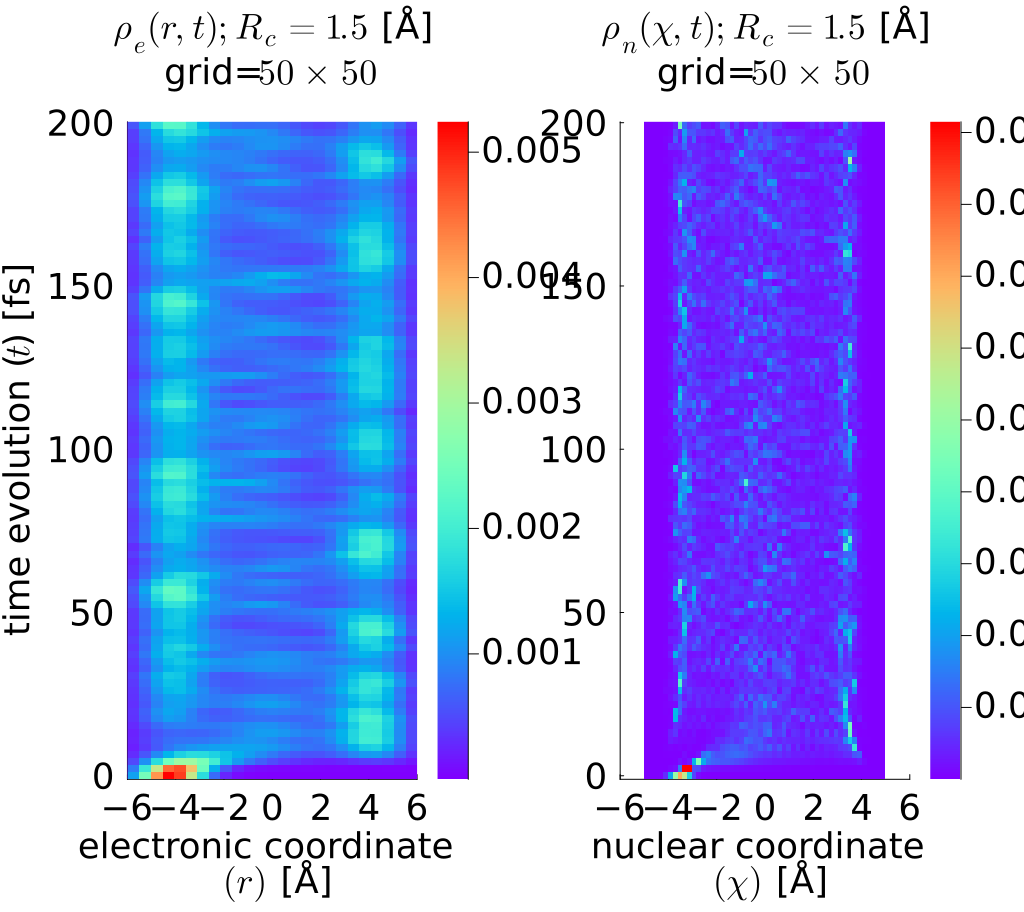

In [131]:
if (set_Rc_value==1)
    plot1=heatmap(DOF_r./Angstrom_to_au, time_vec./Femtoseconds_to_au,transpose(electronic_ρ_matrix_χ),
                c = :rainbow1,xlims=(-6,6),grid = false)
else (set_Rc_value==2)
    plot1=heatmap(DOF_r./Angstrom_to_au, time_vec./Femtoseconds_to_au,transpose(electronic_ρ_matrix_χ),
                c = :rainbow1,xlims=(-6,6),grid = false)
end
plot1=plot!(xlabel="electronic coordinate \n \$(r)\$ [Å]",ylabel="time evolution (\$t\$) [fs]")
plot1=plot!(title="\$\\rho_{e}(r,t);R_{c}=$(round(Rc/Angstrom_to_au,digits=2))\$ [Å]\ngrid=\$$(n_1D_r)\\times$(n_1D_r)\$\n")
plot1=plot!(xtickfont=font(24),ytickfont=font(24),xguidefontsize=24,yguidefontsize=24,titlefontsize=24)

if (set_Rc_value==1)
    plot2=heatmap(DOF_χ./Angstrom_to_au, time_vec./Femtoseconds_to_au,transpose(nuclear_ρ_matrix_χ),
                c = :rainbow1,xlims=(-6,6),grid = false)
else (set_Rc_value==2)
    plot2=heatmap(DOF_χ./Angstrom_to_au, time_vec./Femtoseconds_to_au,transpose(nuclear_ρ_matrix_χ),
                c = :rainbow1,xlims=(-6,6),grid = false)
end
plot2=plot!plot2=plot!(xlabel="nuclear coordinate \n \$(\\chi)\$ [Å]")
plot2=plot!(title="\$\\rho_{n}(\\chi,t);R_{c}=$(round(Rc/Angstrom_to_au,digits=2))\$ [Å]\ngrid=\$$(n_1D_r)\\times$(n_1D_r)\$\n")
plot2=plot!(xtickfont=font(24),ytickfont=font(24),xguidefontsize=24,titlefontsize=24)

plot3=plot(plot1,plot2,layout=(1,2),size=(1024,912))
# savefig(plot3,path_images_paper*"probability_density_Rc$(round(Rc/Angstrom_to_au;digits=2))_grid$(n_1D_r)x$(n_1D_R).eps")
display(plot3)